In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [7]:
sample = pd.read_csv('sample_submission.csv')
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [8]:
test.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,37061,Male,19.0,0,0,No,Private,Rural,92.61,16.8,never smoked
1,42333,Male,53.0,0,0,Yes,Govt_job,Urban,94.03,26.5,NaN
2,58964,Female,51.0,0,0,Yes,Private,Rural,127.22,31.0,smokes
3,34063,Female,17.0,0,0,No,Private,Rural,112.15,19.8,NaN
4,43682,Female,41.0,0,0,Yes,Govt_job,Urban,112.17,27.5,never smoked


In [9]:
train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


# Preprocessing

In [10]:
train.gender.fillna('NaN').value_counts() ## checking does Gender feature
                                          ## has NaN values

Female    17676
Male      12315
Other        10
Name: gender, dtype: int64

In [11]:
test.gender.fillna('NaN').value_counts()

Female    7989
Male      5410
Other        1
Name: gender, dtype: int64

In [12]:
train['Gender_1'] = (train.gender == 'Female') * 1 ## creating binary 
train['Gender_2'] = (train.gender == 'Male') * 1 ## features from
train['Gender_3'] = (train.gender == 'Other') * 1 ## info about gender

In [13]:
test['Gender_1'] = (test.gender == 'Female') * 1
test['Gender_2'] = (test.gender == 'Male') * 1
test['Gender_3'] = (test.gender == 'Other') * 1

In [14]:
train.Residence_type.fillna('NaN').value_counts() ## checking does 
                                                  ## Res_type feature
                                                  ## has NaN values

Urban    15028
Rural    14973
Name: Residence_type, dtype: int64

In [15]:
test.Residence_type.fillna('NaN').value_counts()

Urban    6728
Rural    6672
Name: Residence_type, dtype: int64

In [16]:
Residence_type_dict = {'Urban' : 0, 'Rural' : 1} ## dictionary to convert
                                                ## Res_type to binary
                                                ## feature

In [17]:
## converting Res_type to bin feature
train['Residence_type'] =train['Residence_type'].replace(Residence_type_dict)
test['Residence_type'] = test['Residence_type'].replace(Residence_type_dict)

In [18]:
train.ever_married.fillna('NaN').value_counts() ## checking does 
                                                ## ever_married feature
                                                ## has NaN values

Yes    19376
No     10625
Name: ever_married, dtype: int64

In [19]:
test.ever_married.fillna('NaN').value_counts()

Yes    8562
No     4838
Name: ever_married, dtype: int64

In [20]:
ever_married_dict = {'Yes': 1, 'No':0 } ## dictionary to convert 
                                        ## ever_married to binary
                                        ## feature

In [21]:
## converting ever_married feature to binary
train['ever_married'] = train['ever_married'].replace(ever_married_dict)
test['ever_married'] = test['ever_married'].replace(ever_married_dict)

In [22]:
train.work_type.fillna('NaN').value_counts() ## checking does work_type
                                            ## feature has NaN values

Private          17220
Self-employed     4674
children          4188
Govt_job          3804
Never_worked       115
Name: work_type, dtype: int64

In [23]:
test.work_type.fillna('NaN').value_counts()

Private          7615
Self-employed    2119
children         1968
Govt_job         1636
Never_worked       62
Name: work_type, dtype: int64

In [24]:
## converting work_type to n binary features
train['Work_1'] = (train.work_type == 'Private') * 1
train['Work_2'] = (train.work_type == 'Self-employed') * 1
train['Work_3'] = (train.work_type == 'children') * 1
train['Work_4'] = (train.work_type == 'Govt_job') * 1
train['Work_5'] = (train.work_type == 'Never_worked') * 1

In [25]:
test['Work_1'] = (test.work_type == 'Private') * 1
test['Work_2'] = (test.work_type == 'Self-employed') * 1
test['Work_3'] = (test.work_type == 'children') * 1
test['Work_4'] = (test.work_type == 'Govt_job') * 1
test['Work_5'] = (test.work_type == 'Never_worked') * 1

In [26]:
## checking does smoking_status has NaN values 
train.smoking_status = train.smoking_status.fillna('NaN')

In [27]:
train.smoking_status.value_counts()

never smoked       11079
NaN                 9176
formerly smoked     5183
smokes              4563
Name: smoking_status, dtype: int64

In [28]:
test.smoking_status = test.smoking_status.fillna('NaN')

In [29]:
test.smoking_status.value_counts()

never smoked       4975
NaN                4116
formerly smoked    2310
smokes             1999
Name: smoking_status, dtype: int64

In [30]:
## converting smoking_status to n binary features
train['Smoking_1'] = (train.smoking_status == 'never smoked') * 1
train['Smoking_2'] = (train.smoking_status == 'NaN') * 1
train['Smoking_3'] = (train.smoking_status == 'formerly smoked') * 1
train['Smoking_4'] = (train.smoking_status == 'smokes') * 1

In [31]:
test['Smoking_1'] = (test.smoking_status == 'never smoked') * 1
test['Smoking_2'] = (test.smoking_status == 'NaN') * 1
test['Smoking_3'] = (test.smoking_status == 'formerly smoked') * 1
test['Smoking_4'] = (test.smoking_status == 'smokes') * 1

In [32]:
train.hypertension.fillna('NaN').value_counts()
train.heart_disease.fillna('NaN').value_counts()
# binary 0 1 features no NaN's

0    28566
1     1435
Name: heart_disease, dtype: int64

In [33]:
test.hypertension.fillna('NaN').value_counts()
test.heart_disease.fillna('NaN').value_counts()
# binary 0 1 features no NaN's

0    12773
1      627
Name: heart_disease, dtype: int64

In [34]:
## filling NaN values with mean value of feature to include this values 
## in training without influecing it
train.bmi = train.bmi.fillna(train.bmi.mean())

In [35]:
test.bmi = test.bmi.fillna(test.bmi.mean())

In [36]:
from sklearn import preprocessing, linear_model

In [37]:
min_max_scaler = preprocessing.MinMaxScaler() ## scaling real valued data
train[['age', 'avg_glucose_level', 'bmi']] = min_max_scaler.fit_transform(train[['age', 'avg_glucose_level', 'bmi']])

In [38]:
test[['age', 'avg_glucose_level', 'bmi']] = min_max_scaler.fit_transform(test[['age', 'avg_glucose_level', 'bmi']])

In [39]:
train.bmi.value_counts()

0.212134    1017
0.201143     196
0.194286     192
0.200000     183
0.192000     182
            ... 
0.596571       1
0.569143       1
0.525714       1
0.020571       1
1.000000       1
Name: bmi, Length: 537, dtype: int64

In [40]:
## Creating list of features we will be working with
features_list = ['age', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'avg_glucose_level', 'bmi', 'Gender_1', 'Gender_2', 'Gender_3',
       'Work_1', 'Work_2', 'Work_3', 'Work_4', 'Work_5', 'Smoking_1',
       'Smoking_2', 'Smoking_3', 'Smoking_4']

# Training models

## XGBoost

In [45]:
import xgboost as xgb
from sklearn.model_selection import KFold

In [46]:
from sklearn.metrics import roc_curve, roc_auc_score

## Dividing data on train and test
kf = KFold(n_splits = 5, random_state=10)

## Dividing train dataset on features and target
features = np.array(train[features_list])
target = np.array(train['stroke'])

## Choosing model – XGBoost Classifier
## Doing Cross-validation for 1, 3 and 5 depth trees, with 5, 10, 25, 50, 100, 250, 500, (1000 – only for depth = 1) estimators
scores = [ [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
mean_scores = []

i = 0
for depth, estim in zip([1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5],
                        [5, 10, 25, 50, 100, 250, 500, 1000, 5, 10, 25, 50, 100, 250, 500, 5, 10, 25, 50, 100, 250, 500]):
    clf = xgb.XGBClassifier(max_depth = depth, n_estimators = estim, random_state=1)
    preds = []
    
    ## Cross-Validation
    for train_index, test_index in kf.split(X=features, y=target): ## Splitting data for cross-validation
        X_train, X_test = features[train_index], features[test_index]
        y_train, y_test = target[train_index], target[test_index]
        clf.fit(X_train, y_train) ## Fitting choosed classifier
        prediction = clf.predict_proba(X_test)[:,1] ## Getting predictions using fitted classifier
        preds.append(roc_auc_score(y_test, prediction)) ## Calculating ROC-AUC score for each pair of parameters

        scores[i].append(preds)
    i += 1
    
for j in range(len(scores)): ## Calculating mean ROC-AUC score for each pair of parameters
    mean_scores.append(np.mean(scores[j]))

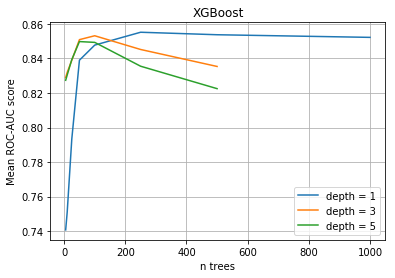

In [47]:
## Plotting ROC-AUC scores as function of number of trees
trees1 = np.array( [ 5, 10, 25, 50, 100, 250, 500, 1000 ] )
trees35 = np.array( [ 5, 10, 25, 50, 100, 250, 500] )

plt.figure()
plt.plot(trees1, mean_scores[:8], label='depth = 1')
plt.plot(trees35, mean_scores[8:15], label='depth = 3')
plt.plot(trees35, mean_scores[15:], label='depth = 5')

plt.title('XGBoost')
plt.xlabel('n trees')
plt.ylabel('Mean ROC-AUC score')
plt.grid()
plt.legend()

In [74]:
xgboost = max(mean_scores)
print( 'Max ROC-AUC score = {}'.format(round(xgboost, 3)) )
print( 'Kaggle score = 0.85996' )

Max ROC-AUC score = 0.618
Kaggle score = 0.85996


In [59]:
## Predictng values of stroke feature on test
clf = xgb.XGBClassifier(max_depth = 1, n_estimators = 250, random_state=1)
clf.fit(train[features_list], train['stroke'])

pred = clf.predict_proba(test[features_list])[:,1]

sample['stroke'] = pred

sample.to_csv('submit1.csv', index = None )

## SGD (Stochastic Gradient Descent)

In [60]:
scores = [ [], [], [], [], [], [], [], [], [], [], [], [] ]
mean_scores = []

## Choosing model – SGD
## Doing Cross-validation for l1 and l2 penalties, with lg(alpha) = -6, -5, -4, -3, -2, -1, 0
## Changing amount of maximum iterations doesn't influence anything significantly, so it's constant
i = 0
for alpha, penalty in zip([1, 0.1, 0.001, 0.0001, 0.00001, 1e-6, 1, 0.1, 0.001, 0.0001, 0.00001, 1e-6],
                        ['l1', 'l1', 'l1', 'l1', 'l1', 'l1', 'l2', 'l2', 'l2', 'l2', 'l2', 'l2']):
    clf = linear_model.SGDClassifier(max_iter=1000,  loss='log', penalty = penalty, alpha = alpha)
    preds = []
    
    ## Cross-Validation
    for train_index, test_index in kf.split(X=features, y=target): ## Splitting data for cross-validation
        X_train, X_test = features[train_index], features[test_index]
        y_train, y_test = target[train_index], target[test_index]
        clf.fit(X_train, y_train) ## Fitting choosed classifier
        prediction = clf.predict_proba(X_test)[:,1] ## Getting predictions using fitted classifier
        preds.append(roc_auc_score(y_test, prediction)) ## Calculating ROC-AUC score for each pair of parameters

        scores[i].append(preds)
    i += 1
    
for j in range(len(scores)): ## Calculating mean ROC-AUC score for each pair of parameters
    mean_scores.append(np.mean(scores[j]))

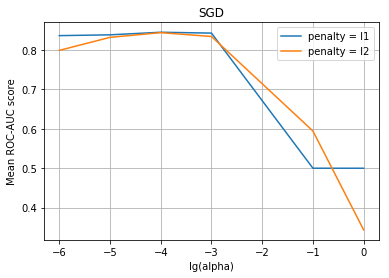

In [61]:
## Plotting ROC-AUC scores as function of alpha
alpha = np.array( [ 1, 0.1, 0.001, 0.0001, 0.00001, 1e-6 ] )

plt.figure()
plt.plot(np.log10(alpha), mean_scores[:6], label='penalty = l1')
plt.plot(np.log10(alpha), mean_scores[6:], label='penalty = l2')

plt.title('SGD')
plt.xlabel('lg(alpha)')
plt.ylabel('Mean ROC-AUC score')
plt.grid()
plt.legend()

In [62]:
sgd = max(mean_scores)
print( 'Max ROC-AUC score = {}'.format(round(sgd, 3)) )
print( 'Kaggle score = 0.86331' )

Max ROC-AUC score = 0.845


In [63]:
## Predictng values of stroke feature on test
clf = linear_model.SGDClassifier(max_iter=1000,  loss='log', penalty = 'l1', alpha = 1e-3)
clf.fit(train[features_list], train['stroke'])

pred = clf.predict_proba(test[features_list])[:,1]

sample['stroke'] = pred

sample.to_csv('submit2.csv', index = None )

## kNN

In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [122]:
scores = [ [], [], [], [], [], [], [], [], [], [], [], [], [] ]
mean_scores = []

## Choosing model – kNN
## Doing Cross-validation for some n_neighbors
i = 0
for neigh in [3, 5, 10, 15, 20, 30, 40, 50, 75, 100, 200, 300, 500]:
    clf = KNeighborsClassifier(n_neighbors=neigh)
    preds = []
    
    ## Cross-Validation
    for train_index, test_index in kf.split(X=features, y=target): ## Splitting data for cross-validation
        X_train, X_test = features[train_index], features[test_index]
        y_train, y_test = target[train_index], target[test_index]
        clf.fit(X_train, y_train) ## Fitting choosed classifier
        prediction = clf.predict_proba(X_test)[:,1] ## Getting predictions using fitted classifier
        preds.append(roc_auc_score(y_test, prediction)) ## Calculating ROC-AUC score for each pair of parameters

        scores[i].append(preds)
        #print(scores)
    i += 1
    
for j in range(len(scores)): ## Calculating mean ROC-AUC score for each pair of parameters
    mean_scores.append(np.mean(scores[j]))

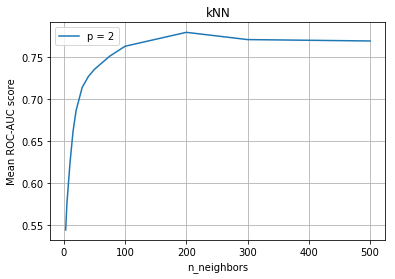

In [123]:
## Plotting ROC-AUC scores as function of number of neighbors
neighbors = np.array( [ 3, 5, 10, 15, 20, 30, 40, 50, 75, 100, 200, 300, 500 ] )

plt.figure()
plt.plot(neighbors, mean_scores, label='p = 2')

plt.title('kNN')
plt.xlabel('n_neighbors')
plt.ylabel('Mean ROC-AUC score')
plt.grid()
plt.legend()

In [127]:
knn = max(mean_scores)
print( 'Max ROC-AUC score = {}'.format(round(knn, 3)) )
print( 'Kaggle score = 0.80377' )

Max ROC-AUC score = 0.78
Kaggle score = 0.80377


In [126]:
## Predictng values of stroke feature on test
clf = KNeighborsClassifier(n_neighbors=200)
clf.fit(train[features_list], train['stroke'])

pred = clf.predict_proba(test[features_list])[:,1]

sample['stroke'] = pred

sample.to_csv('submit3.csv', index = None )

# Best algorithm
### According to kaggle and cv scores, t the best algorithm out of 3 is SGD with logarithmic loss function and L1 penalty.

## PCA Training

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
pca.fit(train[features_list])

In [ ]:
train_pca_transformed =  pca.transform(train[features_list])

In [ ]:
test_pca_transformed =  pca.transform(test[features_list])